<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
!pip install bs4
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd

Download the webpage at the url


In [3]:
data = requests.get(url).text

Create a soup object


In [6]:
soup = BeautifulSoup(data, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [14]:
table = soup.find('table')

Save the scrapped data into a file named *popular-languages.csv*


In [15]:
import csv

with open('popular-languages.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Language', 'Annual Average Salary'])
    
    for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
        # Get all columns in each row.
        cols = row.find_all('td') # in html a column is represented by the tag <td>
        language = cols[1].getText() # store the value in column 3 as color_name
        avg_sal = cols[3].getText() # store the value in column 4 as color_code
        csv_writer.writerow([language, avg_sal])

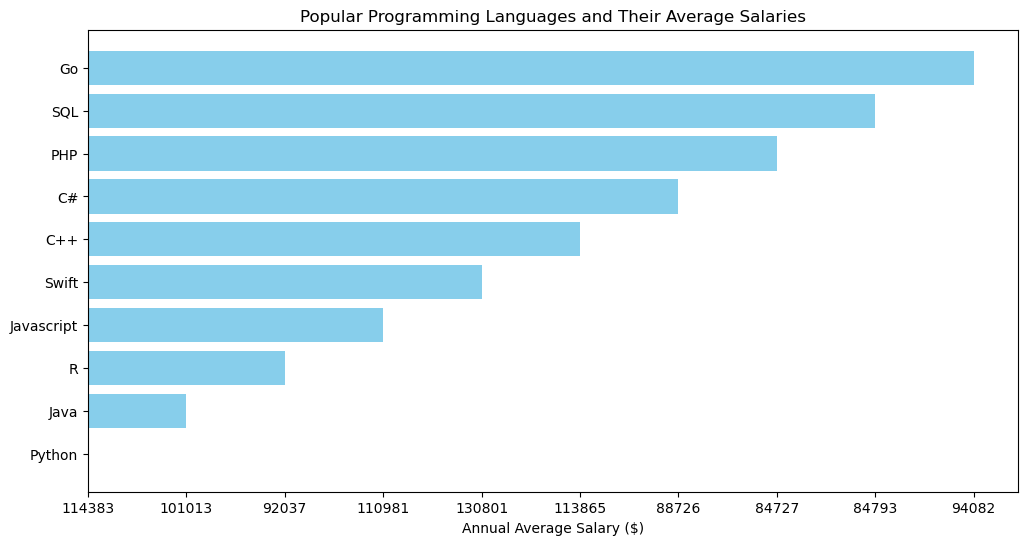

In [20]:
import matplotlib.pyplot as plt

with open('popular-languages.csv', 'r', newline='', encoding='utf-8') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)  # Skip the header row
        next(csv_reader)

        # Extract data for plotting
        languages = []
        salaries = []

        for row in csv_reader:
            languages.append(row[0])
            salaries.append(row[1].replace('$', '').replace(',', ''))

        # Create a bar chart
        plt.figure(figsize=(12, 6))
        plt.barh(languages, salaries, color='skyblue')
        plt.xlabel('Annual Average Salary ($)')
        plt.title('Popular Programming Languages and Their Average Salaries')
        plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
